# Machine Learning for Weather Prediction:
A comperative study of models Techniques

Weather prediction is a critical of everyday life,affecting various fields such as agriculture and transport. This has been done traditionally by using complex physical models that simulate atmospheric processes. However,the rise of big data and machine learing has led to increased interest in data-driven weather forcasting.The reseach involved application of different machine learning techniques to predct short-team weather patterns.it aims at finding out which algorithms worked best for predicting temperature,humidity,and precipitation by comparing their performances.Machine Learning Models can provide accurate predictions in due time making them fit well with traditional methods.

Chapter 1: Introduction

1.1 Background
Weather forcast and practical significance have always been combining both scientific inquiry and practical importance.Precise projections are crucial for agricaulture,disaster management as well as day decision-making.These models based on atmospheric physics but often fail to give accurate results especially in complex surroundings.

1.2 Problem Statement
The rise in the availability of weather data from past periods has provided an opportunity to enhance forecasting precision through application of machine learning;temperature,humidity,precipitation are among them.

Objectives 1.3

The primary objective for this thisis include:
Testing the efficiency of various ML-based models used in weather prediction.
Comparing predictive accuracy of ML models with the converntionally employed forecasting techniques.
identifiying important features and data pre-processing steps that improve model performance.
Research Questions 1.4
To this end, the research will address three questions:
which ML based models are most effective in predicting short term conditions.
what is a comperision between machine learning and model predictions and traditional meteological  methods?
How does feature selection and preprocessing contribute to improving prediction accuracy?

Chapter 2: Review of Literature

2.1 Conventional Approaches to Weather Forecasting

A critique of physics-based models utilized for weather prediction such as numerical weather prediction (NWP) models and their limitations.

2.2 Machine Learning in Weather Prediction

A survey of machine learning approaches used in weather forecasting, which includes time series regression, ensemble methods, deep learning and deep neural networks.

2.3 Comparative Studies and Benchmarking

Existing comparative studies between machine learning models and traditional methods are discussed, thereby identifying research gaps.

Chapter 3: Methodology

3.1 Data Collection and Preprocessing

The datasets that have been used in the study include historical meteorological station data on weather, satellite data and reanalysis data. Explain data cleaning, normalization and feature engineering processes.

3.2 Model Selection

Some of the machine learning algorithms used in this research include:

LogisticRegression,KNeighborsClassifier,SVM,XGBClassifier,RandomForestClassifier

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import IsolationForest,RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,f1_score


In [ ]:
# Load the dataset
df = pd.read_csv("/content/weather.csv")
df.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
df.shape

(13200, 11)

In [ ]:
df.describe().T

count         mean        std     min    25%      50%  \
Temperature           13200.0    19.127576  17.386327  -25.00    4.0    21.00   
Humidity              13200.0    68.710833  20.194248   20.00   57.0    70.00   
Wind Speed            13200.0     9.832197   6.908704    0.00    5.0     9.00   
Precipitation (%)     13200.0    53.644394  31.946541    0.00   19.0    58.00   
Atmospheric Pressure  13200.0  1005.827896  37.199589  800.12  994.8  1007.65   
UV Index              13200.0     4.005758   3.856600    0.00    1.0     3.00   
Visibility (km)       13200.0     5.462917   3.371499    0.00    3.0     5.00   

                            75%      max  
Temperature             31.0000   109.00  
Humidity                84.0000   109.00  
Wind Speed              13.5000    48.50  
Precipitation (%)       82.0000   109.00  
Atmospheric Pressure  1016.7725  1199.21  
UV Index                 7.0000    14.00  
Visibility (km)          7.5000    20.00

In [ ]:
#checking null values
df.isnull().sum().sum()

0

In [ ]:
# checking duplicated values
df.duplicated().sum()

0

In [ ]:
df.nunique()

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Cloud Cover                4
Atmospheric Pressure    5456
UV Index                  15
Season                     4
Visibility (km)           41
Location                   3
Weather Type               4
dtype: int64

In [ ]:
# Adding liner to plotly figure
def add_line(x0=0, y0=0,x1=0,y1=0,
             line_color="#d4de10",font_color="#d4de10",
             xposition='right', text='Test'):
  fig.add_shape(type='line',x0=x0,y0=y0,x1=x1,y1=y1+2,
                line={
                    'color':line_color,
                    'width': 3,
                    'dash' : 'dashdot'
                },
                label = {
                    "text": f'\t{text}: {x1:0.1f}\t'.expandtabs(5),
                    "testposition": 'end',
                    "yanchor":'top',
                    "xanchor": xposition,
                    "textangle" : 0,
                    "font": {
                        "size": 14,
                        "color" : font_color,
                        "family" : "arial"
                    },
                }
                )

In [ ]:
def custome_layout(title_size=28,hover_font_size=16,showlegend=False):
  fig.update_layout(
      showlegend=showlegend,
      title = {
          "font" : {
              "size": title_size,
              "family": "thoma"
          }
      },
      hoverlabel = {
          'bgcolor': '#635050',
          "font_size" : hover_font_size,
          "font_family" : "arial"
      }
  )

In [ ]:
def count_bar_plot(data_frame,column_name,x_title=None,y_title=None,title="None",title_size=28,
                   showlegend = False, hover_template="None", bars_names=None):

  counts = data_frame[column_name].value_counts(Normalize=1)*100

  fig = px.bar(
      data_frame=counts,
      x = counts.index if bars_names is None else bars_names,
      y = counts / sum(counts)*100,
      template = "plotly_white",
      labels = {"x":x_title if x_title is not None else column_name, "y": "Frequency in PCT(%)"},
      text = counts.apply(lambda x: f'{x:0.0f}%'),
      title = title,
      color = counts.index.astype(str)
  )
  fig.update_layout(
      showlegend = showlegend,
      title = {
          "font":{
              "size":title_size,
              "family":'tahoma'
          }
      },
      hovel_label = {
          'bgcolor': '#111',
          'font_size': 16,
          'font_family': 'arial'
      }
  )
  fig.update_traces(
      textfont = {
          "size" : 18,
          "family" : "consolas",
          "color" : "#fff"
      },
      hovertempate = hover_template,
  )
  return fig

In [ ]:
from tempfile import template
fig = px.box(
    x = df["Temperature"],
    title = "Temperature 5 Number Summary",
    template = "plotly_white",
    labels = {"x": "Temperture"}
)
custome_layout()
iplot(fig)

In [ ]:
mean_of_humidity = df['Humidity'].mean()
median_of_humidity = df["Humidity"].median()

In [ ]:
fig = px.histogram(
    df["Humidity"],
    nbins=25,
    title= "Distribution of huidity",
    template="plotly_white",
    labels={"value" :"Humidity"}
)

custome_layout()
fig.update_traces(
    textfont = {
        "size" : 20,
        "family" :"tahoma",
        "color": "#fff"
    },
    hovertemplate = "Humidity: %{x}<br>Frequency: %{y}",
    marker=dict(line=dict(color='#000', width=0.2))
)


# Adding Mean Line
#add_line(x0=mean_of_humidity, y0=0, x1=mean_of_humidity, y1=95, line_color="#AF2655",font_color="#AF2655",
        # text="Mean",xposition="right")

# Adding Median Line
#add_line(x0=median_of_humidity, y0=0, x1=median_of_humidity, y1=95, line_color="#0C356A",
        # font_color="#0C356A",xposition="left", text="Median")


iplot(fig)

In [ ]:
fig = px.histogram(
    df["Wind Speed"],
    nbins=25,
    title= "Wind Distribution",
    template="plotly_white",
    labels={"value" :"Wind Speed"}
)

custome_layout()
fig.update_traces(
    textfont = {
        "size" : 20,
        "family" :"tahoma",
        "color": "#fff"
    },
    hovertemplate = "Wind Speed: %{x}<br>Frequency: %{y}",
    marker=dict(line=dict(color='#000', width=0.2))
)

plt.tight_layout()
plt.show()
# Adding Mean Line
#add_line(x0=mean_of_age, y0=0, x1=mean_of_age, y1=95, line_color="#AF2655",font_color="#AF2655",
        # text="Mean", xposition="right")

# Adding Median Line
#add_line(x0=median_of_age, y0=0, x1=median_of_age, y1=95, line_color="#0C356A",
 #        font_color="#0C356A", xposition="left", text="Median")

iplot(fig)

<Figure size 640x480 with 0 Axes>

In [ ]:
fig = px.histogram(
    df["Precipitation (%)"],
    nbins=25,
    title= "Precipitation Distribution",
    template="plotly_white",
    labels={"value" :"Precipitation"}
)

custome_layout()
fig.update_traces(
    textfont = {
        "size" : 20,
        "family" :"tahoma",
        "color": "#fff"
    },
    hovertemplate = "Precipitation: %{x}<br>Frequency: %{y}",
    marker=dict(line=dict(color='#000', width=0.2))
)


# Adding Mean Line
#add_line(x0=mean_of_age, y0=0, x1=mean_of_age, y1=95, line_color="#AF2655",font_color="#AF2655",
        # text="Mean", xposition="right")

# Adding Median Line
#add_line(x0=median_of_age, y0=0, x1=median_of_age, y1=95, line_color="#0C356A",
 #        font_color="#0C356A", xposition="left", text="Median")

iplot(fig)

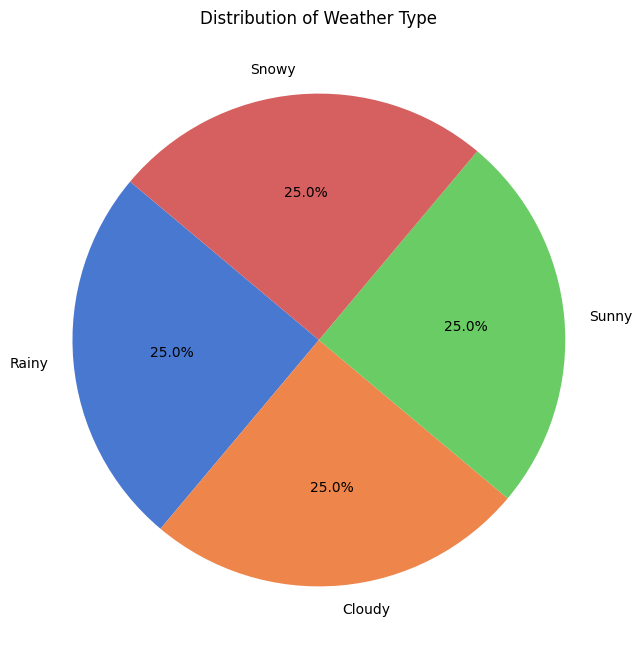

In [ ]:
colors = sns.color_palette('muted')
val = df['Weather Type'].value_counts().values
ind = df['Weather Type'].value_counts().index
plt.figure(figsize=(8, 8))
plt.pie(val, labels=ind, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title(f'Distribution of Weather Type')
plt.show()

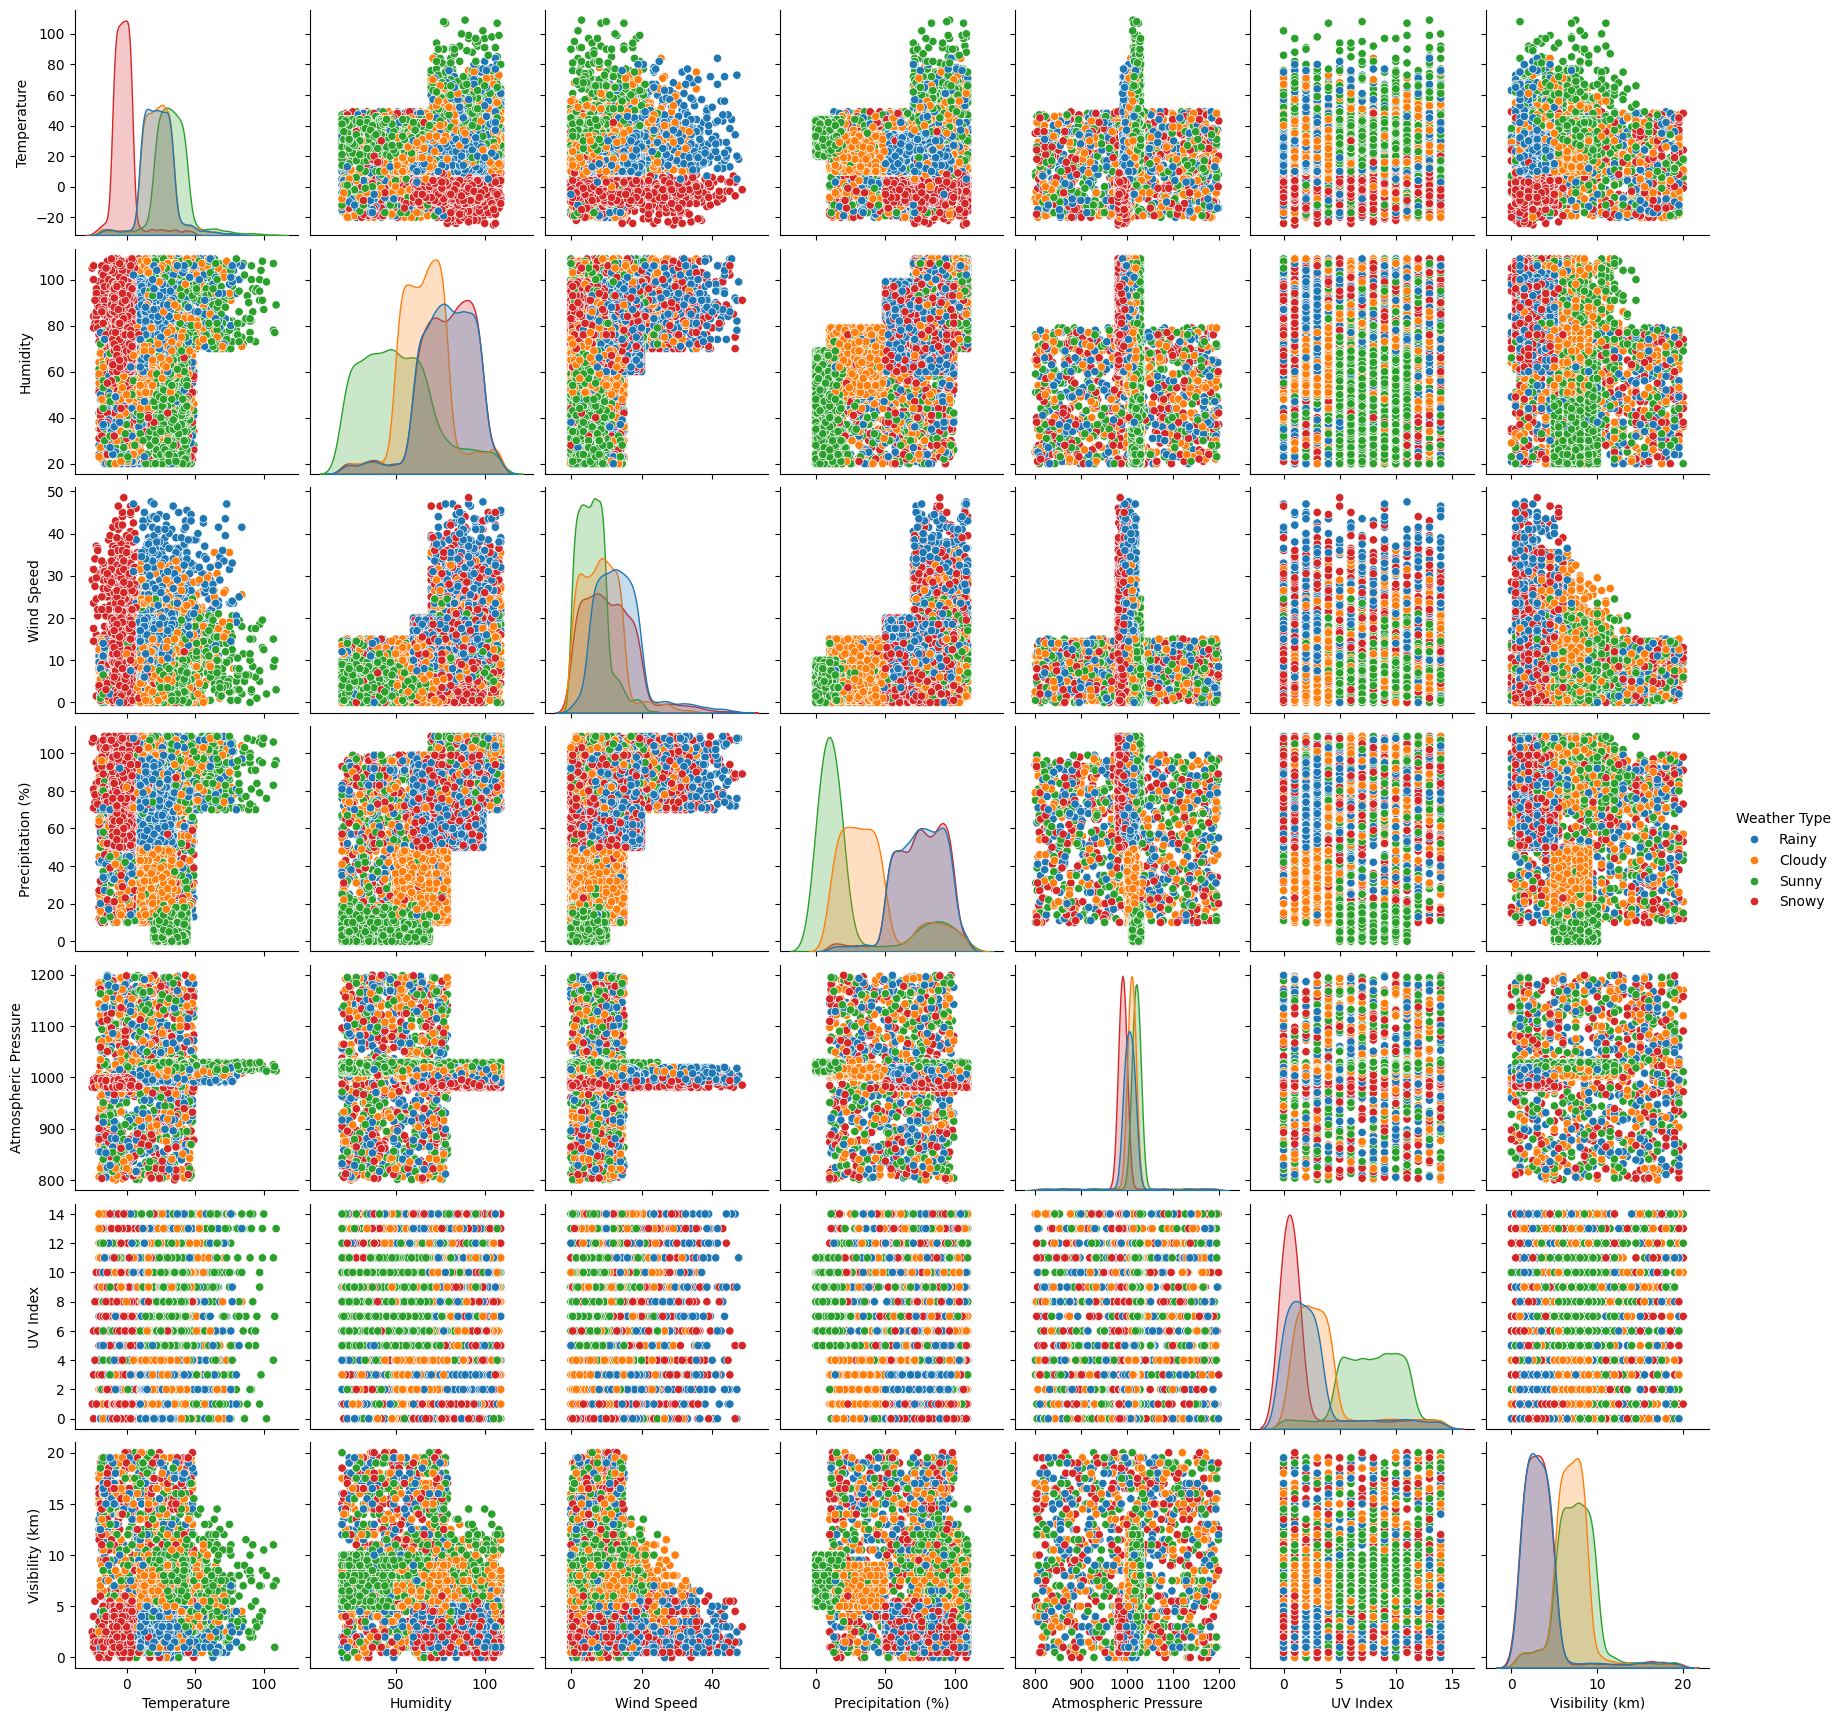

In [ ]:
sns.pairplot(df, hue = 'Weather Type')

In [ ]:
numeric_cols = df.select_dtypes(exclude=["object"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

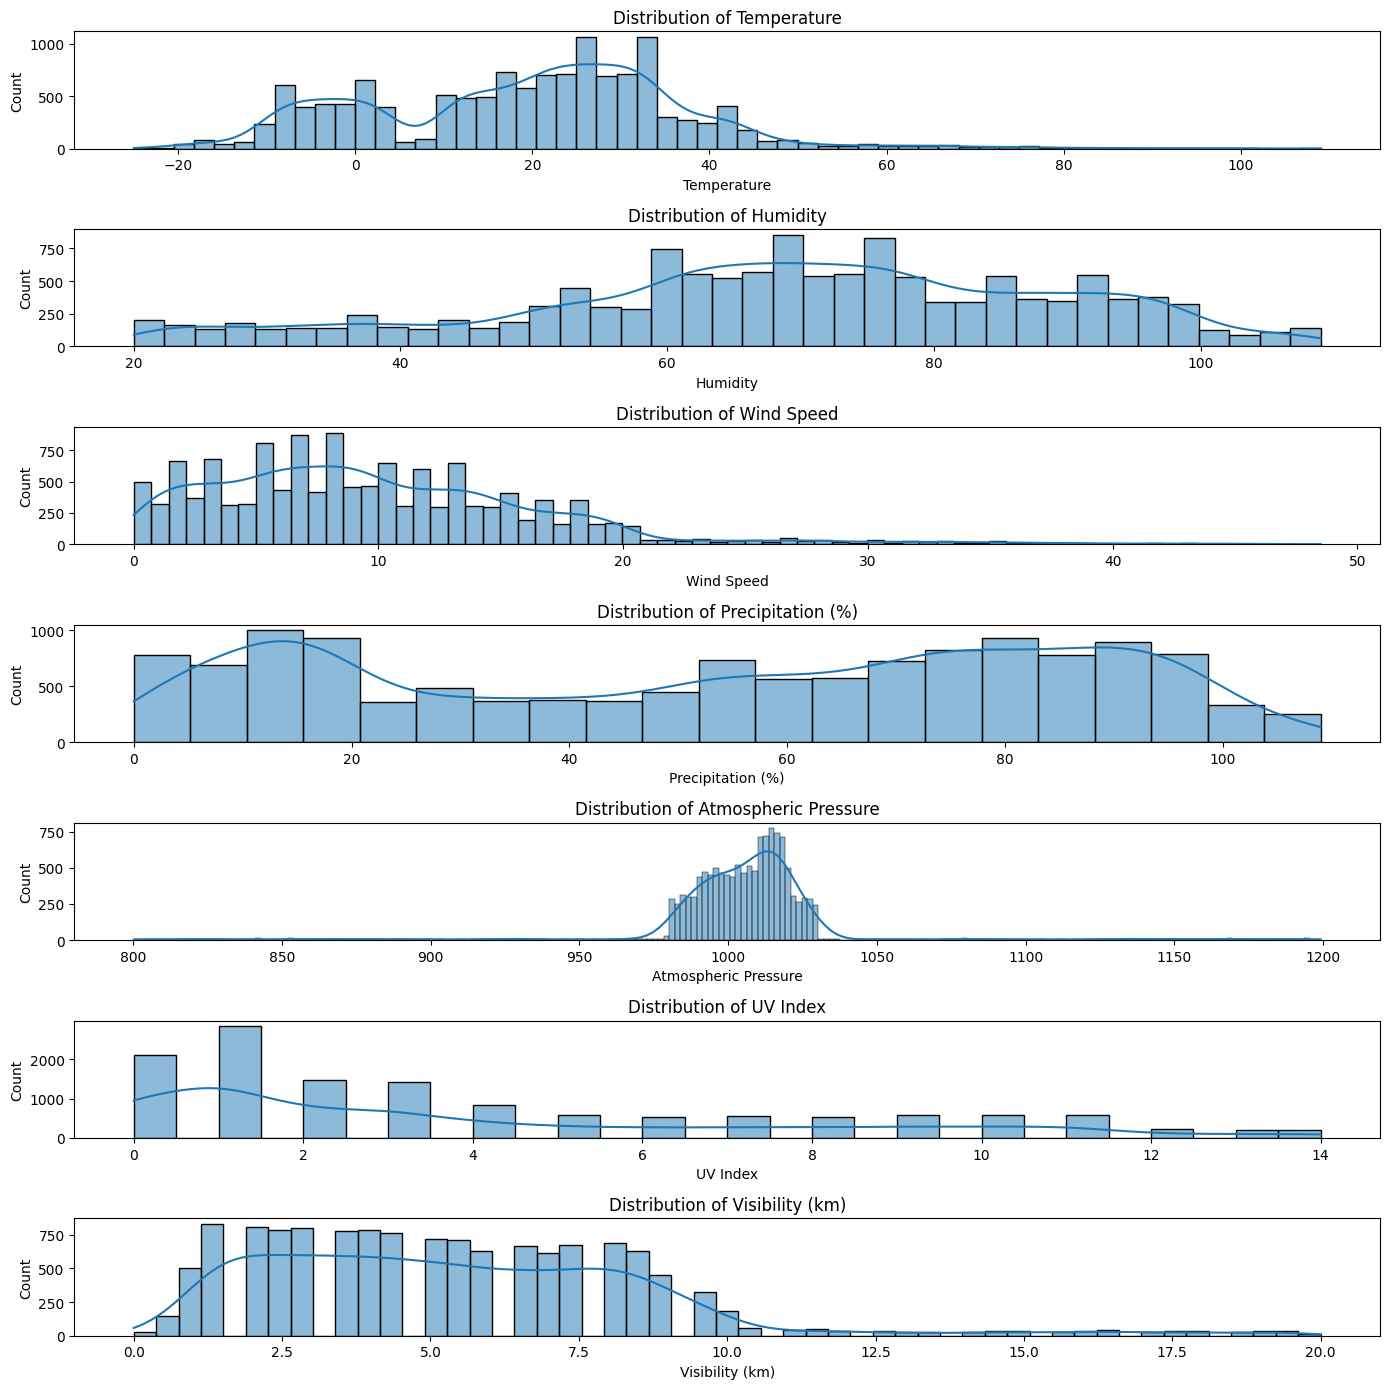

In [ ]:
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(14, 14))

for i, column in enumerate(numeric_cols):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

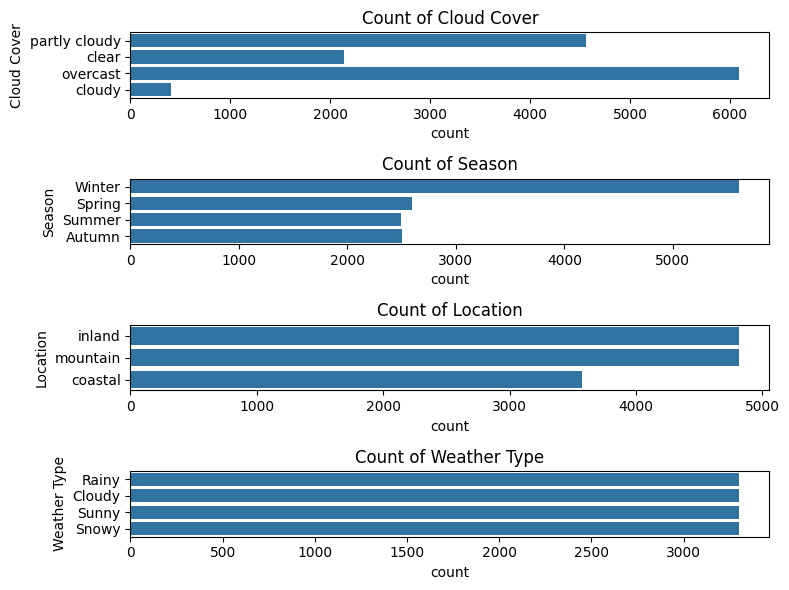

In [ ]:
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 6))

for i, column in enumerate(cat_cols):
    sns.countplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Count of {column}')

plt.tight_layout()
plt.show()

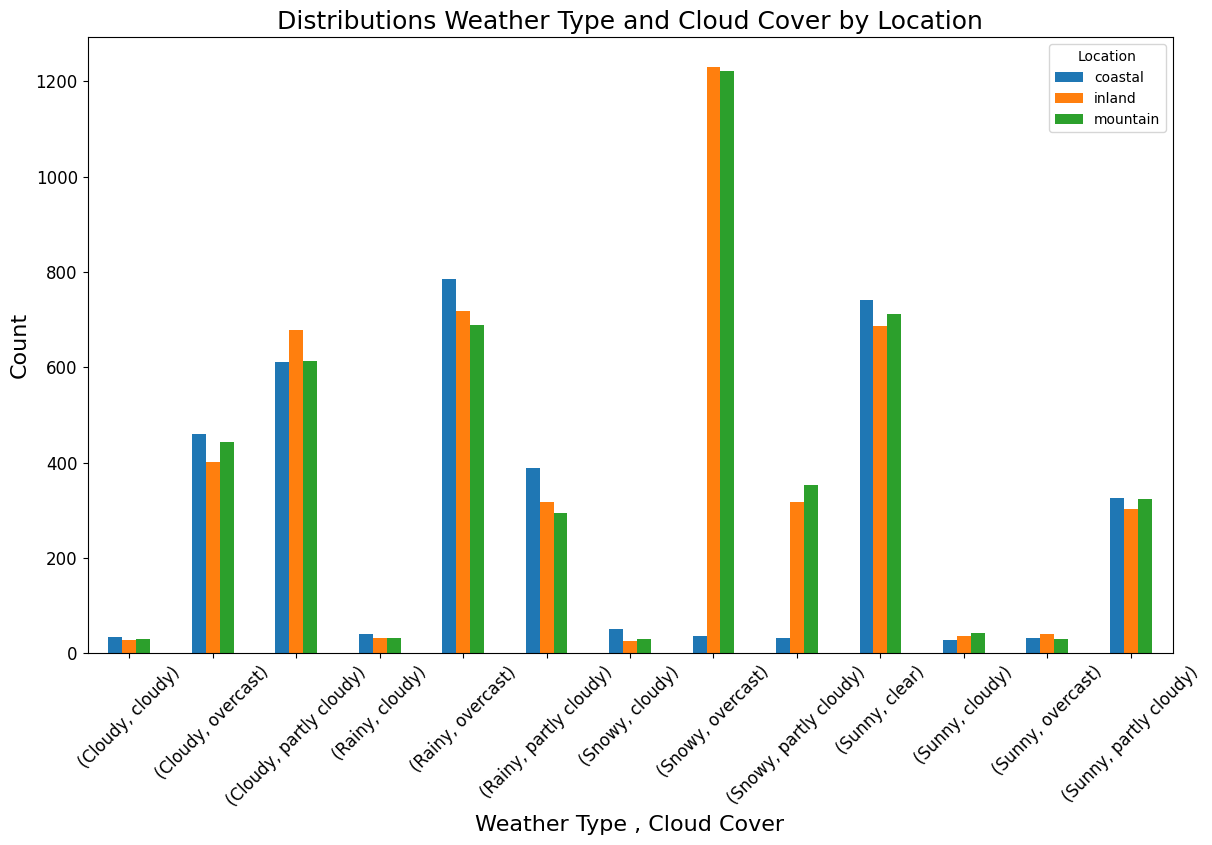

In [ ]:
eda_df = df.groupby(['Location','Weather Type'])['Cloud Cover'].value_counts().unstack(0)
eda_df.plot(kind='bar',figsize=(14,8))
plt.title('Distributions Weather Type and Cloud Cover by Location',fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Weather Type , Cloud Cover',fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

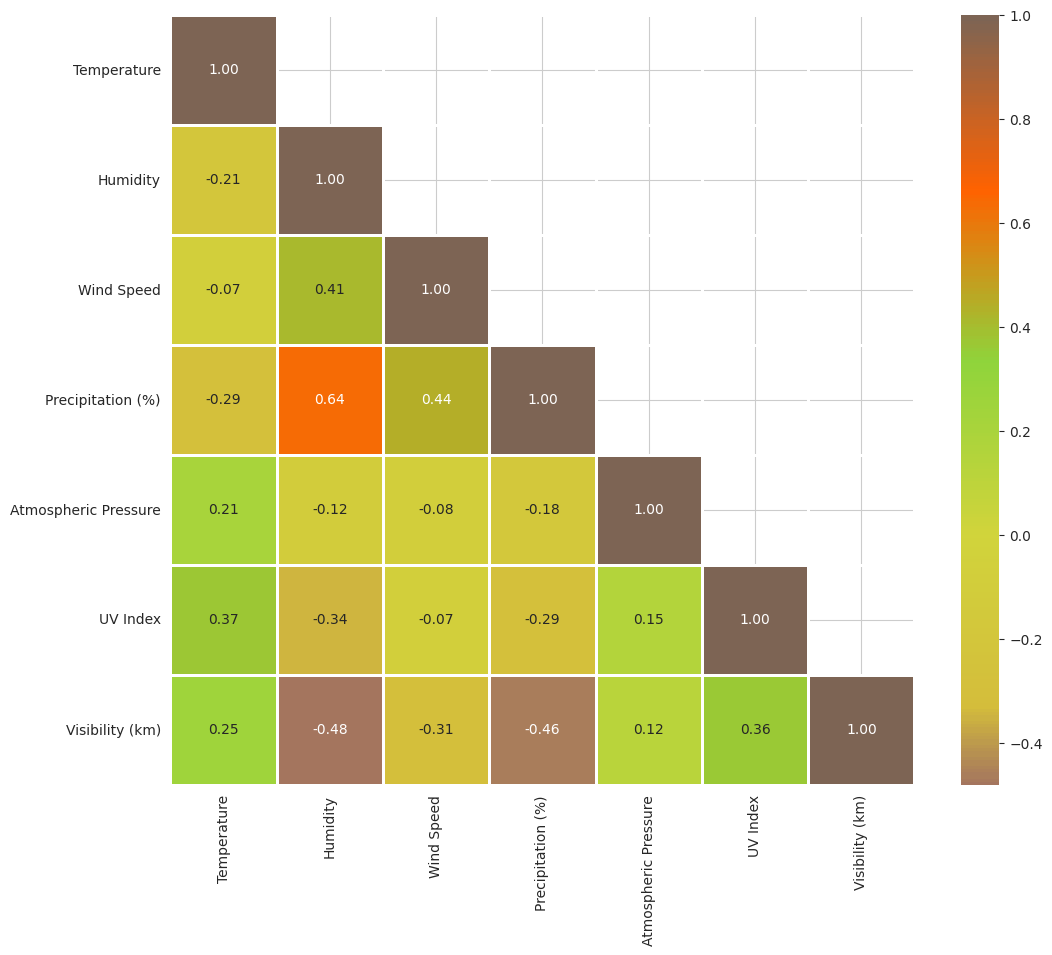

In [ ]:
sns.set_style("whitegrid")

corr = df.drop(cat_cols,axis='columns').corr()
colors = ["#403703","#691c8a","#d4bd3b","#d1d43b","#8fd43b",'#ff6200','#7d6454']
my_cmap = LinearSegmentedColormap.from_list('Custom_map',colors=colors,N=256)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,k=1)] =True

plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, cmap=my_cmap,annot=True,center=0,fmt='.2f',linewidth=2)
plt.show()

In [ ]:
correlations = df.corr(numeric_only=True)
fig = px.imshow(correlations, template="plotly_white",aspect=True, text_auto="0.3f" )
custome_layout(title_size=30,showlegend=False)
fig.update_traces(
    textfont = {
        "size" : 15,
        "family" : "consolas"
    }
)
iplot(fig)

In [ ]:
'''Draw a Bivariate seaborn PairGrid /w density w/ '''
def snsPairGrid(data):
  '''Plots a seaborn Pairgrid w/ KDE & scatter plot of data features '''
  g = sns.PairGrid(data, diag_sharey=False )
  g.fig.set_size_inches(14,13)
  g.map_diag(sns.kdeplot, lw=2)               # draw kde approximation on the diagonal
  g.map_lower(sns.scatterplot,s=15,edgecolor='k',linewidth=1,alpha=0.4) #scatter plot on lower half
  g.map_lower(sns.kdeplot, cmap='plasma',n_levels=10 ) # kde approximation on lower half
  plt.tight_layout()

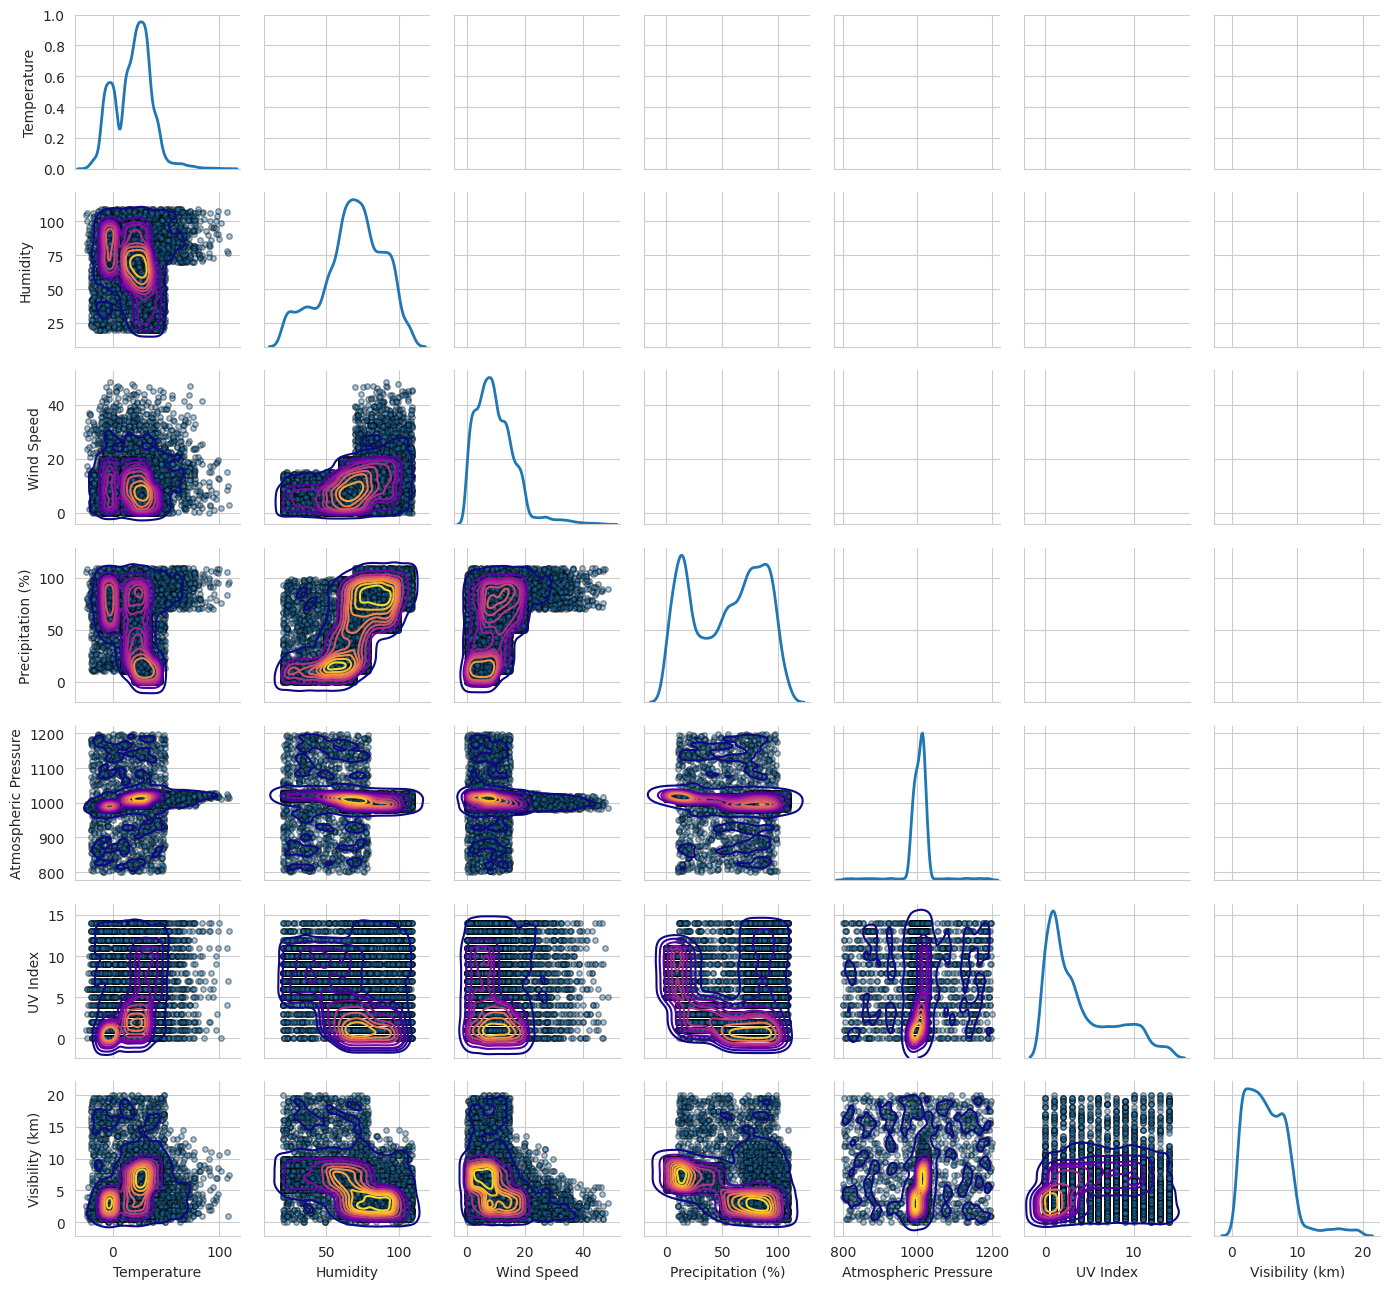

In [ ]:
snsPairGrid(df)

In [ ]:
X = df.drop(["Weather Type"],axis=1)
y = df['Weather Type']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.feature_selection import SelectPercentile,chi2

# Define numerical and categorical columns
numerical_features = X.select_dtypes(exclude='object').columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()


# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define transformas
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

])
categorical_transformer = Pipeline(steps=[
    ('onehot',OneHotEncoder(handle_unknown='ignore')),
    ('selector',SelectPercentile(chi2,percentile=50)),
])

# create the column transformer
preprocessor = ColumnTransformer(
    transformers =[
        ('num',numerical_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ]

  )
np.random.seed(0)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def evaluate_model(y_true, y_pred,y_proba):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred,average='weighted')
  recall = recall_score(y_true, y_pred,average='weighted')
  f1 = f1_score(y_true,y_pred,average='weighted')
  if y_proba is not None:
    roc = roc_auc_score(pd.get_dummies(y_true),y_proba,multi_class='ovr',average='weighted')
  else:
    roc = float('nan') # Cannot calculate ROC AUC without probabilities
  return accuracy,precision,recall,f1,roc

In [ ]:
# Model and their hyperparameters for GridSearchCV
models = {
    'lr' : (LogisticRegression(max_iter=100),{'classifier__C':[0.1,1,10]}),
    'knn' : (KNeighborsClassifier(), {'classifier__n_neighbors':[3,5,7]}),
    'svm' : (SVC(probability=True),{'classifier__C':[0.1,1,10],'classifier__kernel': ['linear','rbf']}),
    'rf' : (RandomForestClassifier(),{'classifier__n_estimators':[50, 100, 200]}),
    'xgb' : (XGBClassifier(use_label_encoder=False,eval_metric='logloss'),{'classifier__n_estimators':[50, 100,200]})
}
model_list = []
train_results = []
test_results = []

# Stratified K-Flod cross validator
sk = StratifiedKFold(n_splits=5)
#for name, (model, params) in models.items():
for name,(model,params) in models.items():
  # Create the full pipeline with preprocessing and the model
  pipeline = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('classifier', model)
  ])
  # GridSearchCV
  grid_seach = GridSearchCV(pipeline,param_grid=params,cv=sk,scoring='accuracy',n_jobs=-1)
  grid_seach.fit(X_train,y_train)

  # get the best model
  best_model = grid_seach.best_estimator_

  # Make predictions
  y_train_pred = best_model.predict(X_train)
  if hasattr(best_model, "predict_proba"):
    y_train_proba = best_model.predict_proba(X_train)
  else:
    y_train_proba = None
  y_test_pred = best_model.predict(X_test)
  if hasattr(best_model,"predict_proba"):
    y_test_proba = best_model.predict_proba(X_test)
  else:
    y_test_proba = None

  # Evaluate on the train set
  train_accuracy,train_precision,train_recall,train_f1,train_roc_auc = evaluate_model(y_train,y_train_pred,y_train_proba)
  test_accuracy,test_precision,test_recall,test_f1,test_roc_auc = evaluate_model(y_test,y_test_pred,y_test_proba)

  print(name)
  model_list.append(name)

  print("Model performance for training set")
  print(f'- accuracy :{train_accuracy:.4f}')
  print(f'- precesion :{train_precision:.4f}')
  print(f'- recall :{train_recall:.4f}')
  print(f'- f1 :{train_f1:.4f}')
  print(f'- roc :{train_roc_auc:.4f}')

  print("-----------------------------------")

  print("Model performance for test set")
  print(f'- accuracy :{test_accuracy:.4f}')
  print(f'- precesion :{test_precision:.4f}')
  print(f'- recall :{test_recall:.4f}')
  print(f'- f1 :{test_f1:.4f}')
  print(f'- roc :{test_roc_auc:.4f}')

  print("="*35)
  print("\n")

  # Store results
  train_results.append({
      'model':name,
      'accuracy':train_accuracy,
      'precision':train_precision,
      'recall':train_recall,
      'f1':train_f1,
      'roc':train_roc_auc
  })
  test_results.append({
      'model':name,
      'accuracy':test_accuracy,
      'precision':test_precision,
      'recall':test_recall,
      'f1':test_f1,
      'roc':test_roc_auc
  })

# Optionally convert results to DataFrame for better readability
train_results_df = pd.DataFrame(train_results)
test_results_df = pd.DataFrame(test_results)

print(train_results_df)
print(test_results_df)


lr
Model performance for training set
- accuracy :0.8717
- precesion :0.8722
- recall :0.8717
- f1 :0.8717
- roc :0.9600
-----------------------------------
Model performance for test set
- accuracy :0.8705
- precesion :0.8714
- recall :0.8705
- f1 :0.8703
- roc :0.9587


knn
Model performance for training set
- accuracy :0.9312
- precesion :0.9319
- recall :0.9312
- f1 :0.9313
- roc :0.9958
-----------------------------------
Model performance for test set
- accuracy :0.8996
- precesion :0.9004
- recall :0.8996
- f1 :0.8997
- roc :0.9733


svm
Model performance for training set
- accuracy :0.9818
- precesion :0.9819
- recall :0.9818
- f1 :0.9818
- roc :0.9991
-----------------------------------
Model performance for test set
- accuracy :0.9098
- precesion :0.9103
- recall :0.9098
- f1 :0.9100
- roc :0.9872


rf
Model performance for training set
- accuracy :1.0000
- precesion :1.0000
- recall :1.0000
- f1 :1.0000
- roc :1.0000
-----------------------------------
Model performance for 